In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [64]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
from os import path
path ='/content/drive/MyDrive/CVS/Shopping_CustomerData.csv'
df = pd.read_csv(path)

df.describe()

,CustomerID,CustomerAge,AnnualIncome,CreditScore,SpendingScore,CustomerCityID
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000
mean,1100.500000,45.520000,285143.931646,719.975000,50.70500,2.850000
std,57.879185,16.113592,169229.187619,104.578236,28.72269,1.475938
min,1001.000000,18.000000,2577.057456,551.000000,2.00000,1.000000
25%,1050.750000,31.750000,153227.340950,628.250000,27.75000,1.750000
50%,1100.500000,46.500000,263418.505550,715.000000,48.00000,3.000000
75%,1150.250000,59.000000,384857.116200,806.250000,77.00000,4.000000
max,1200.000000,75.000000,695407.091700,897.000000,100.00000,5.000000


In [66]:
df_new = df[["CustomerAge","SpendingScore"]] #menlicing data yang akan di analisis
df_new.head


<bound method NDFrame.head of      CustomerAge  SpendingScore
0             49             78
1             59             63
2             54             69
3             42             30
4             30              6
..           ...            ...
195           54             52
196           20             58
197           44             36
198           28             24
199           41             31

[200 rows x 2 columns]>

In [67]:
df_new.describe()

,CustomerAge,SpendingScore
count,200.000000,200.00000
mean,45.520000,50.70500
std,16.113592,28.72269
min,18.000000,2.00000
25%,31.750000,27.75000
50%,46.500000,48.00000
75%,59.000000,77.00000
max,75.000000,100.00000


In [68]:
df_new.isnull().sum() # mencari data yang null

CustomerAge      0
SpendingScore    0
dtype: int64

In [69]:
df

,CustomerID,CustomerGender,CustomerAge,CustomerCity,AnnualIncome,CreditScore,SpendingScore,CustomerCityID
0,1001,Male,49,Bengaluru,527547.58850,653,78,1
1,1002,Male,59,Bengaluru,207143.19760,630,63,1
2,1003,Female,54,Delhi,164423.84570,555,69,4
3,1004,Female,42,Bengaluru,56220.36443,699,30,1
4,1005,Female,30,Bengaluru,256194.36190,793,6,1
...,...,...,...,...,...,...,...,...
195,1196,Female,54,Delhi,317466.42070,601,52,4
196,1197,Female,20,Bengaluru,323305.50020,554,58,1
197,1198,Male,44,Chennai,109058.54430,844,36,2
198,1199,Male,28,Delhi,160116.89300,837,24,4


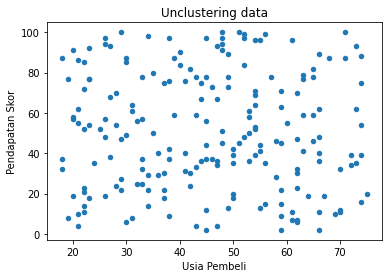

In [70]:
df.plot(kind='scatter', x='CustomerAge', y='SpendingScore')

plt.xlabel('Usia Pembeli')
plt.ylabel('Pendapatan Skor')
plt.title('Unclustering data')
plt.show()

In [71]:
#step 1
k = 3 #asumsikan kita akan mencari 3 cluster
np.random.seed(40)

#disini kita akan mendapat 3 poin random centeroid 
random_centroids=[]
for i in range(1,k+1):
  random_centroids.append([np.random.randint(1,100), np.random.randint(1,100)])
print('randomly selected points as random_centroids:',random_centroids)  

randomly selected points as random_centroids: [[71, 92], [8, 38], [57, 51]]


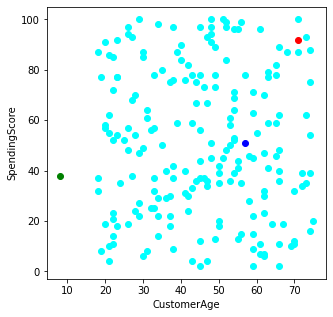

In [72]:
#
plt.figure(figsize=(5, 5))
plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1], color='cyan')
length = len(random_centroids)
colors1=['r','g','b','cyan','yellow','black']
for i in range(length) :
  plt.scatter(*random_centroids[i],color=colors1[i])
  plt.xlabel('CustomerAge')
  plt.ylabel('SpendingScore')
plt.show()  

In [73]:
#Langkah kedua

#Here, we are calculating the distance between the datapoints and our centroids and assigning each data-point to the closest cluster
def assignment(df_new,random_centroids):

  for i in range(length) :
    df_new['Distance from Centroid {}'.format(i)]=(np.sqrt((df_new.iloc[:,0] - random_centroids[i][0]) * 2 + (df_new.iloc[:,1] - random_centroids[i][1]) * 2))
   
  list1=[]
  list2=[]
  for a,b,c in zip(df_new['Distance from Centroid 0'],df_new['Distance from Centroid 1'],df_new['Distance from Centroid 2']):
    d = min(a,b,c)
   
    if d == a:
      list1.append(0)
      list2.append('r')
    elif d == b:
      list1.append(1)
      list2.append('g')
    else:
      list1.append(2)
      list2.append('b')
  df_new['Closest_Centroid'] = list1
  df_new['Color']=list2
  return df_new

In [74]:
df_new = assignment(df_new, random_centroids)
df_new.head()

,CustomerAge,SpendingScore,Distance from Centroid 0,Distance from Centroid 1,Distance from Centroid 2,Closest_Centroid,Color
0,49,78,NaN,12.727922,6.164414,2,b
1,59,63,NaN,12.328828,5.291503,2,b
2,54,69,NaN,12.409674,5.477226,2,b
3,42,30,NaN,7.211103,NaN,2,b
4,30,6,NaN,NaN,NaN,2,b


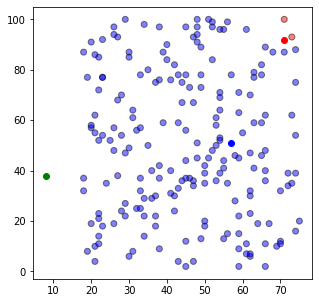

In [75]:
plt.figure(figsize=(5,5))
plt.scatter(df_new.iloc[:,0],df_new.iloc[:,1],color = df_new['Color'],alpha = 0.5,edgecolor = 'k')
for i in range(length):
  plt.scatter(*random_centroids[i],color=colors1[i])

In [78]:
#step-3
def update(parameter):
  for i in range(length):
    random_centroids[i][0] = np.mean(df_new[df_new['Closest_Centroid'] == i]['CustomerAge'])
    random_centroids[i][1] = np.mean(df_new[df_new['Closest_Centroid'] == i]['SpendingScore'])
  return parameter  

In [79]:
random_centroids = update(random_centroids)
random_centroids

[[72.0, 96.5], [nan, nan], [45.25252525252525, 50.24242424242424]]

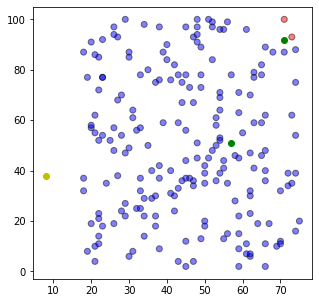

In [52]:
#step last
#mencari titik centroid paling tepat
df_new = assignment(df_new, random_centroids)
df_new.head()
plt.figure(figsize=(5, 5))
plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1], color=df_new['Color'], alpha=0.5, edgecolor='k')
for i in range(length):
  plt.scatter(*random_centroids[i], color=colors1[i])
plt.show()


In [ ]:
count=1
while True:
  old_random_centroids = np.round(random_centroids)
  print('Old Centroid' ,old_random_centroids)
  count+=1
  random_centroids = update(random_centroids)
 
  new_random_centroids = np.round(random_centroids)
  print('New Centroid' ,new_random_centroids)
 
  df_new = assignment(df_new, random_centroids)
  result=np.allclose(old_random_centroids,new_random_centroids)
  print(result)
  if result == True:
    break
 
 
print(count)

Streaming output truncated to the last 5000 lines.
 [ nan  nan]
 [ 45.  50.]]
New Centroid [[ 71. 100.]
 [ nan  nan]
 [ 45.  50.]]
False
Old Centroid [[ 71. 100.]
 [ nan  nan]
 [ 45.  50.]]
New Centroid [[ 71. 100.]
 [ nan  nan]
 [ 45.  50.]]
False
Old Centroid [[ 71. 100.]
 [ nan  nan]
 [ 45.  50.]]
New Centroid [[ 71. 100.]
 [ nan  nan]
 [ 45.  50.]]
False
Old Centroid [[ 71. 100.]
 [ nan  nan]
 [ 45.  50.]]
New Centroid [[ 71. 100.]
 [ nan  nan]
 [ 45.  50.]]
False
Old Centroid [[ 71. 100.]
 [ nan  nan]
 [ 45.  50.]]
New Centroid [[ 71. 100.]
 [ nan  nan]
 [ 45.  50.]]
False
Old Centroid [[ 71. 100.]
 [ nan  nan]
 [ 45.  50.]]
New Centroid [[ 71. 100.]
 [ nan  nan]
 [ 45.  50.]]
False
Old Centroid [[ 71. 100.]
 [ nan  nan]
 [ 45.  50.]]
New Centroid [[ 71. 100.]
 [ nan  nan]
 [ 45.  50.]]
False
Old Centroid [[ 71. 100.]
 [ nan  nan]
 [ 45.  50.]]
New Centroid [[ 71. 100.]
 [ nan  nan]
 [ 45.  50.]]
False
Old Centroid [[ 71. 100.]
 [ nan  nan]
 [ 45.  50.]]
New Centroid [[ 71. 100.]


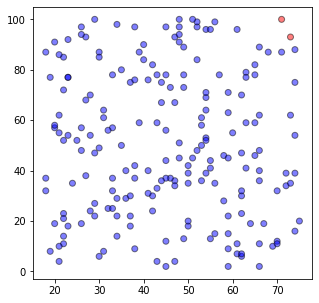

In [34]:
plt.figure(figsize=(5, 5))
plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1], color=df_new['Color'], alpha=0.5, edgecolor='k')
plt.show()

In [36]:
df = df[["CustomerAge","SpendingScore"]]
df.head()

,CustomerAge,SpendingScore
0,49,78
1,59,63
2,54,69
3,42,30
4,30,6


In [38]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [39]:
labels = kmeans.predict(df)
labels

array([1, 0, 1, 2, 2, 1, 2, 1, 2, 1, 2, 0, 0, 2, 0, 0, 2, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 2, 0, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 2, 1, 0, 2,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 2, 0, 2, 0, 0, 0, 2,
       1, 0, 0, 1, 0, 2, 1, 2, 0, 1, 1, 2, 2, 0, 0, 0, 1, 0, 2, 0, 1, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1,
       2, 1, 0, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 0, 0, 1, 1, 1, 0, 2,
       1, 1, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 1, 1, 0, 1, 0,
       0, 0, 2, 1, 0, 1, 0, 1, 2, 1, 2, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 2,
       1, 2, 2, 0, 0, 1, 1, 0, 2, 0, 1, 2, 0, 2, 1, 0, 2, 0, 1, 0, 0, 0,
       2, 2], dtype=int32)

In [40]:
centroids = kmeans.cluster_centers_
centroids

array([[47.06756757, 47.05405405],
       [44.82089552, 84.65671642],
       [44.37288136, 16.72881356]])

In [41]:
kmeans.inertia_

69228.85879694519

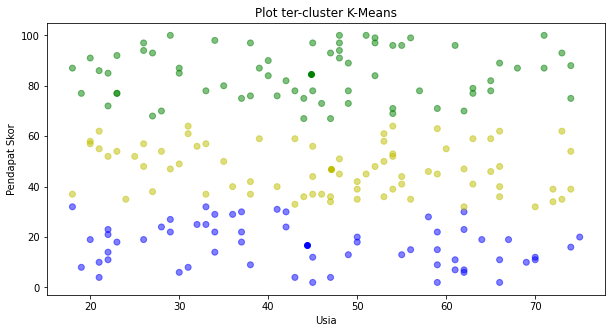

In [42]:
plt.figure(figsize=(10, 5))
colmap = {1:'y',2:'g',3:'b',4:'r',5:'c'}
colors = map(lambda x: colmap[x+1], labels)
print(colors)
colors1=list(colors)
plt.scatter(df['CustomerAge'], df['SpendingScore'], color=colors1, alpha=0.5)
for idx, centroid in enumerate(centroids):
  plt.scatter(*centroid, color=colmap[idx+1])
plt.xlabel('Usia')
plt.ylabel('Pendapat Skor')
plt.title('Plot ter-cluster K-Means')
plt.show()  

In [43]:
inertia_list = []
for num_clusters in np.arange(1, 21):
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(df)
  inertia_list.append(kmeans.inertia_)

In [44]:
inertia_list

[215843.515,
 93076.9609500805,
 69228.85879694519,
 52539.82162646518,
 38741.97371675943,
 30306.492221416454,
 25131.82143271798,
 21663.654961919176,
 19221.242838497223,
 16872.916942084976,
 14890.486279107601,
 13234.64485400221,
 12365.163150901384,
 11423.45297250909,
 10527.503920907095,
 10067.625739933439,
 9294.80662959761,
 8724.608968808967,
 8164.305776971569,
 7660.685627934159]

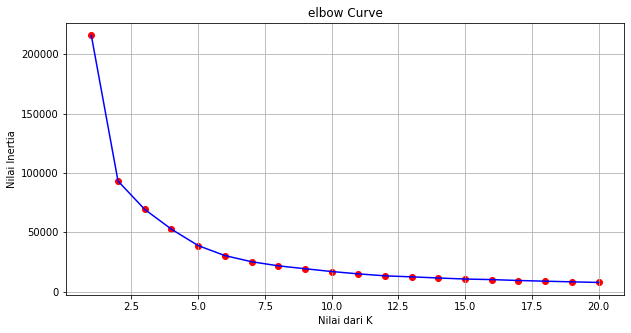

In [46]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, 21), inertia_list, color='blue')
plt.scatter(np.arange(1, 21), inertia_list, color='red')
plt.grid(True)
plt.xlabel('Nilai dari K')
plt.ylabel('Nilai Inertia')
plt.title('elbow Curve')
plt.show()